# Move On Safely EverYone (MOSEY)
Exploratory Data Analysis for Streamlit app: https://mosey-score.streamlit.app/

### Contents
* Load files from MassDOT: https://apps.impact.dot.state.ma.us/cdv/
* Data exploration
* Preliminary plots
  * Crash data for cars and pedstrians 
  * Plots with latitude and longitude on x/y plane
* OpenStreetMap
  * Car crashes: 100 points
  * Car crashes: 1000 points with crashes (blue), pedestrian crashes (red)
  * Address with proximity box (gray) with near crashes

## Load files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import requests
from dotenv import load_dotenv
import os

In [2]:
folder = '../data_sources/'
crash_file = 'export_2_5_2024_12_39_01.csv' # 2013-2023 Malden, Melrose, Medford, Saugus, Stoneham, Woburn

all_crash_df = pd.read_csv(folder + crash_file, skipfooter=3, engine='python',
    dtype={'year': 'Int32', 'speed_limit': 'Int32'})

## Data exploration

In [3]:
all_crash_df.head()

,Crash Number,City Town Name,Crash Date,Crash Severity,Crash Status,Crash Time,Crash Year,Max Injury Severity Reported,Number of Vehicles,Police Agency Type,...,Terrain-linked RD,Urban Location Type-linked RD,AADT Derivation-linked RD,AADT Station Number-linked RD,Opposing Direction Speed Limit-linked RD,Undivided Left Shoulder Type-linked RD,Undivided Left Shoulder Width-linked RD,Truck Exclusion Type-linked RD,Truck Exclusion Time-linked RD,Federal Functional Classification-linked RD
0,1531131,MALDEN,01/06/2003,Not Reported,Closed,1:30 PM,2003,Not reported,1,Local police,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1534486,MALDEN,01/01/2003,Not Reported,Closed,4:00 AM,2003,Not reported,2,Local police,...,Level,"Not applicable (i.e., not a principal arterial...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other
2,1534489,MALDEN,01/02/2003,Not Reported,Closed,7:00 AM,2003,Not reported,2,Local police,...,Level,High density business/commercial center (exclu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other
3,1534497,MALDEN,01/02/2003,Non-fatal injury,Closed,4:10 AM,2003,Non-fatal injury - Possible,3,Local police,...,Level,"High density residential (5,000 or more person...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor Arterial
4,1534501,MALDEN,01/02/2003,Non-fatal injury,Closed,2:30 PM,2003,Non-fatal injury - Non-incapacitating,2,Local police,...,Level,Low density commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other


In [4]:
all_crash_df.describe()

,Crash Number,Crash Year,Number of Vehicles,MassDOT District,Total Fatalities,Total Non-Fatal Injuries,Speed Limit,Vulnerable User Sequence of Events (All Persons),Vulnerable User Distracted By (All Persons),Vulnerable User Traffic Control Type (All persons),...,Surface Width-linked RD,Right Shoulder Width-linked RD,Number of Travel Lanes-linked RD,Number of Opposing Travel Lanes-linked RD,Median Width-linked RD,Number of Peak Hour Lanes-linked RD,Speed Limit-linked RD,AADT Station Number-linked RD,Opposing Direction Speed Limit-linked RD,Undivided Left Shoulder Width-linked RD
count,9.743100e+04,97431.000000,97431.000000,97431.0,97431.000000,97431.000000,51369.000000,0.0,0.0,0.0,...,86823.000000,86634.000000,86883.000000,82808.000000,39948.000000,13928.000000,35294.000000,1498.000000,16757.000000,20174.000000
mean,3.384012e+06,2012.406288,1.931336,4.0,0.002084,0.328499,35.627363,NaN,NaN,NaN,...,32.772238,1.960096,2.283266,0.663764,11.812782,3.473004,45.804329,5247.884513,30.640449,0.176713
std,1.241400e+06,6.272886,0.625690,0.0,0.047365,0.668357,13.852986,NaN,NaN,NaN,...,10.384174,3.858971,0.800482,1.331542,33.035586,0.900039,21.701200,2489.806823,35.700009,1.034454
min,1.531131e+06,2003.000000,0.000000,4.0,0.000000,0.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000
25%,2.208633e+06,2007.000000,2.000000,4.0,0.000000,0.000000,25.000000,NaN,NaN,NaN,...,25.000000,0.000000,2.000000,0.000000,0.000000,3.000000,30.000000,4159.000000,0.000000,0.000000
50%,3.393844e+06,2012.000000,2.000000,4.0,0.000000,0.000000,30.000000,NaN,NaN,NaN,...,32.000000,0.000000,2.000000,0.000000,5.000000,4.000000,35.000000,5103.000000,25.000000,0.000000
75%,4.551954e+06,2018.000000,2.000000,4.0,0.000000,0.000000,45.000000,NaN,NaN,NaN,...,41.000000,2.000000,2.000000,0.000000,16.000000,4.000000,55.000000,5693.000000,35.000000,0.000000
max,5.355843e+06,2023.000000,14.000000,4.0,3.000000,13.000000,330.000000,NaN,NaN,NaN,...,80.000000,24.000000,4.000000,4.000000,450.000000,5.000000,99.000000,21045.000000,99.000000,8.000000


In [5]:
crash_cols = ['Crash Number', 'City Town Name', 'Crash Date', 'Crash Severity', 'Crash Time', 'Crash Year',
       'Max Injury Severity Reported', 'Number of Vehicles', 'First Harmful Event',
       'Is Geocoded', 'Light Conditions', 'Manner of Collision', 'Road Surface Condition', 
       'Total Fatalities', 'Total Non-Fatal Injuries', 'Weather Conditions',
       'Most Harmful Event (All Vehicles)', 'Speed Limit', 'Traffic Control Device Function',
       'Latitude', 'Longitude']

In [6]:
all_malden_df = all_crash_df[all_crash_df['City Town Name'] == 'MALDEN'][crash_cols]

malden_df = all_malden_df[all_malden_df['Crash Year'] >= 2013]
malden_df['Crash Year'].value_counts().sort_index()

Crash Year
2013     816
2014     529
2015     764
2016     945
2017    1014
2018     976
2019     946
2020     668
2021     803
2022     948
2023     894
Name: count, dtype: int64

In [7]:
crash_count = pd.DataFrame()
crash_count['Crashes'] = pd.DataFrame(malden_df['Crash Year'].value_counts().sort_index())
crash_count

,Crashes
Crash Year,
2013,816
2014,529
2015,764
2016,945
2017,1014
2018,976
2019,946
2020,668
2021,803


In [8]:
ped_crash = malden_df[malden_df['First Harmful Event'] == 'Collision with pedestrian']
ped_crash

,Crash Number,City Town Name,Crash Date,Crash Severity,Crash Time,Crash Year,Max Injury Severity Reported,Number of Vehicles,First Harmful Event,Is Geocoded,...,Manner of Collision,Road Surface Condition,Total Fatalities,Total Non-Fatal Injuries,Weather Conditions,Most Harmful Event (All Vehicles),Speed Limit,Traffic Control Device Function,Latitude,Longitude
47674,3335916,MALDEN,01/11/2013,Non-fatal injury,6:55 AM,2013,Non-fatal injury - Non-incapacitating,1,Collision with pedestrian,Yes,...,Single vehicle crash,Dry,0,1,Clear,V1:(Collision with pedestrian),25.0,Not reported,42.426208,-71.087085
47839,3352304,MALDEN,02/06/2013,Non-fatal injury,5:05 PM,2013,Non-fatal injury - Non-incapacitating,1,Collision with pedestrian,Yes,...,Head-on,Dry,0,1,Clear,V1:(Collision with pedestrian),30.0,"Yes, device functioning",42.425218,-71.087165
52715,3755858,MALDEN,01/24/2013,Non-fatal injury,7:54 PM,2013,Non-fatal injury - Non-incapacitating,1,Collision with pedestrian,Yes,...,Single vehicle crash,Dry,0,1,Clear,V1:(Collision with pedestrian),NaN,"Yes, device functioning",42.423461,-71.072193
52723,3755867,MALDEN,01/31/2013,Non-fatal injury,7:34 AM,2013,Non-fatal injury - Possible,1,Collision with pedestrian,Yes,...,Single vehicle crash,Wet,0,1,Rain,V1:(Collision with pedestrian),NaN,Not reported,42.431111,-71.054727
52798,3756004,MALDEN,01/02/2013,Non-fatal injury,5:30 PM,2013,Non-fatal injury - Possible,1,Collision with pedestrian,Yes,...,Head-on,Dry,0,2,Clear,V1:(Collision with pedestrian),NaN,"No, device not functioning",42.420910,-71.057071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97317,5355688,MALDEN,11/27/2023,Non-fatal injury,12:15 AM,2023,Suspected Minor Injury (B),1,Collision with pedestrian,Yes,...,Single vehicle crash,Wet,0,1,Cloudy/Rain,V1:(Collision with pedestrian),25.0,Not reported,42.432112,-71.029692
97342,5355736,MALDEN,10/11/2023,Non-fatal injury,11:20 PM,2023,Possible Injury (C),1,Collision with pedestrian,Yes,...,Head-on,Dry,0,1,Clear,V1:(Collision with pedestrian),25.0,"Yes, device functioning",42.425852,-71.061799
97362,5355759,MALDEN,12/01/2023,Non-fatal injury,6:25 PM,2023,Suspected Minor Injury (B),1,Collision with pedestrian,Yes,...,Head-on,Wet,0,1,Rain/Rain,V1:(Collision with pedestrian),20.0,Not reported,42.433921,-71.041909
97367,5355764,MALDEN,12/08/2023,Non-fatal injury,6:05 PM,2023,Suspected Minor Injury (B),1,Collision with pedestrian,Yes,...,Single vehicle crash,Dry,0,1,Clear,V1:(Collision with pedestrian),25.0,"Yes, device functioning",42.421737,-71.058702


In [9]:
ped_count = pd.DataFrame()
ped_count['Crashes'] = pd.DataFrame(ped_crash['Crash Year'].value_counts().sort_index())
ped_count.head()

,Crashes
Crash Year,
2013,30
2014,17
2015,18
2016,51
2017,56


## Preliminary plots

Text(0.5, 1.0, 'Car Crashes in Malden')

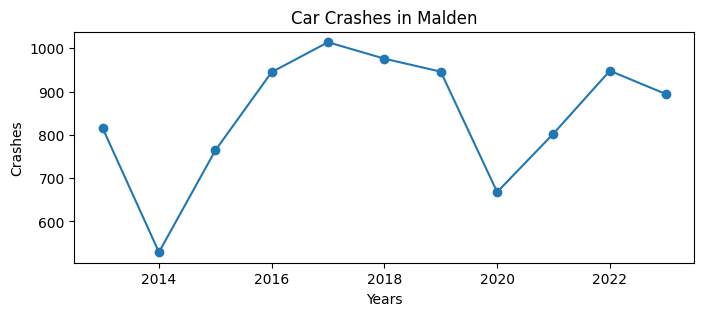

In [10]:
from matplotlib.ticker import FormatStrFormatter
x = np.linspace(2013, 2023, 11)

fig, ax = plt.subplots(figsize=(8, 3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.plot(x, crash_count, 'o-')
ax.set_xlabel('Years')
ax.set_ylabel('Crashes') 
ax.set_title('Car Crashes in Malden')

In [11]:
ped_fatal = malden_df[(malden_df['First Harmful Event'] == 'Collision with pedestrian') & (malden_df['Crash Severity'] == 'Fatal injury')]     
ped_fatal_count = pd.DataFrame(ped_fatal['Crash Year'].value_counts().sort_index())
ped_fatal.head()

,Crash Number,City Town Name,Crash Date,Crash Severity,Crash Time,Crash Year,Max Injury Severity Reported,Number of Vehicles,First Harmful Event,Is Geocoded,...,Manner of Collision,Road Surface Condition,Total Fatalities,Total Non-Fatal Injuries,Weather Conditions,Most Harmful Event (All Vehicles),Speed Limit,Traffic Control Device Function,Latitude,Longitude
52807,3756013,MALDEN,01/09/2013,Fatal injury,6:37 PM,2013,Fatal injury (K),1,Collision with pedestrian,Yes,...,Angle,Wet,1,1,Cloudy,V1:(Collision with pedestrian),NaN,"Yes, device functioning",42.423969,-71.042565
53943,3975673,MALDEN,12/26/2013,Fatal injury,6:13 AM,2013,Fatal injury (K),1,Collision with pedestrian,Yes,...,Single vehicle crash,Dry,1,0,Clear,V1:(Collision with pedestrian),35.0,Not reported,42.425569,-71.041958
61846,4180596,MALDEN,12/27/2015,Fatal injury,7:18 PM,2015,Fatal injury (K),1,Collision with pedestrian,Yes,...,Unknown,Wet,1,0,Rain/Rain,NaN,NaN,Not reported,42.425492,-71.085935
63085,4228771,MALDEN,01/04/2016,Fatal injury,6:19 PM,2016,Fatal injury (K),1,Collision with pedestrian,Yes,...,Single vehicle crash,Dry,1,0,Clear,V1:(Collision with pedestrian),NaN,Not reported,42.428460,-71.063131
65324,4331187,MALDEN,12/22/2016,Fatal injury,7:35 PM,2016,Fatal injury (K),1,Collision with pedestrian,Yes,...,Single vehicle crash,Wet,1,0,Clear,V1:(Collision with pedestrian),25.0,Not reported,42.437425,-71.079719


In [12]:
ped_df = pd.DataFrame()
ped_df['crash_count'] = crash_count['Crashes']
ped_df['ped_crashes'] = ped_crash['Crash Year'].value_counts()
ped_df['ped_fatal'] = ped_fatal_count

ped_df = ped_df.fillna(0)
ped_df

,crash_count,ped_crashes,ped_fatal
Crash Year,,,
2013,816,30,2.0
2014,529,17,0.0
2015,764,18,1.0
2016,945,51,2.0
2017,1014,56,1.0
2018,976,60,0.0
2019,946,47,0.0
2020,668,27,1.0
2021,803,23,1.0


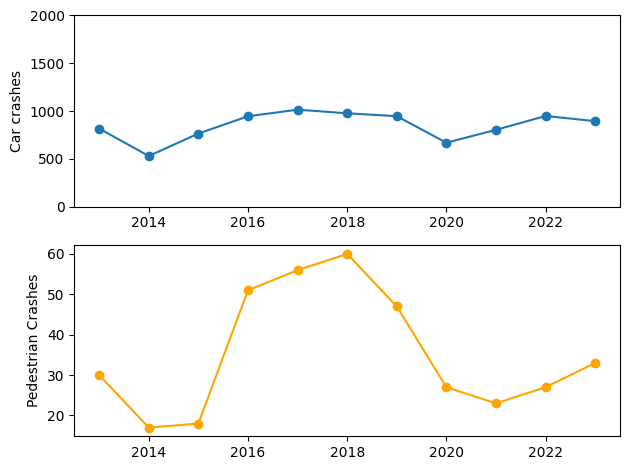

In [13]:
# Car crash / pedestrian crash data
from matplotlib.ticker import FormatStrFormatter
x = np.linspace(2013, 2023, 11)

fig, axes = plt.subplots(2, 1)
axes[0].plot(x, ped_df['crash_count'], 'o-', label='car crashes')

axes[0].set_ylabel('Car crashes')
custom_y_ticks = [0, 500, 1000, 1500, 2000]
axes[0].set_yticks(custom_y_ticks)
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%d'))

axes[1].plot(x, ped_df['ped_crashes'], 'o-', color='orange', label='pedestrian crashes')
axes[1].set_ylabel('Pedestrian Crashes')
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%d'))

# Adjust spacing between subplots to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Crashes with Pedestrians')

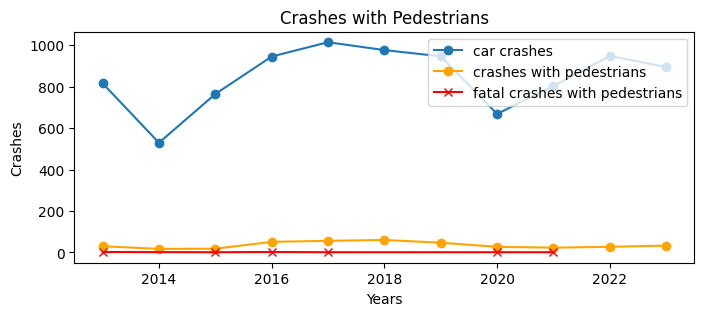

In [14]:
from matplotlib.ticker import FormatStrFormatter
x = np.linspace(2013, 2023, 11)

fig, ax = plt.subplots(figsize=(8, 3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.plot(x, crash_count, 'o-', label='car crashes')
plt.plot(ped_count, 'o-', color='orange', label='crashes with pedestrians')
plt.plot(ped_fatal_count, 'x-', color='red', label='fatal crashes with pedestrians')
ax.legend(loc='upper right')

ax.set_xlabel('Years')
ax.set_ylabel('Crashes') 
ax.set_title('Crashes with Pedestrians')

## Latitude and Longitude plots

In [15]:
# functions for getting address and lat/lon box
def load_data():    
    folder = '../data_sources/'
    crash_file =  'export_2_5_2024_12_39_01.csv' # 2003-2023
    crash_df = pd.read_csv(folder + crash_file, skipfooter=3, engine='python',
                    dtype={'year': 'Int32', 'speed_limit': 'Int32'})
    return crash_df

def geocode(address): # need some sort of try/except if the address doesn't work?
    params = { 'format'        :'json', 
               'addressdetails': 1, 
               'q'             : address}
    headers = {'user-agent'    : 'TDI' }
    geo_data = requests.get('http://nominatim.openstreetmap.org/search', params=params, headers=headers)    
    return geo_data

def get_addr_str(addr_dict):  # for naming files
    num = addr_dict['house_number']    
    new_road = re.sub(" ", "_", addr_dict['road'])
    addr_str = num + '_' + new_road
    return addr_str

def find_box(lat, lon):    
    lat_conv = 0.000000274    #lat: 1 ft = 0.000000274 deg
    lon_conv = 0.000000347    #lon: 1 ft = 0.000000347 deg
    delta = 1000 # feet
    d_lat = delta * lat_conv
    d_lon = delta * lon_conv    
    return(lat-d_lat, lat+d_lat, lon-d_lon, lon+d_lon)

# other names: crash zone, bounding box, search quadrant
def get_zone_df(lat_0, lon_0, crash_df):
    min_lat, max_lat, min_lon, max_lon = find_box(lat_0, lon_0)   
    zone_df = crash_df[crash_df['Latitude'].between(min_lat, max_lat) & crash_df['Longitude'].between(min_lon, max_lon)]
    return zone_df
    
def get_geo_points(lat_0, lon_0, zone_df):
    # Create point geometries
    geo_zone_raw = geopandas.points_from_xy(zone_df['Latitude'], zone_df['Longitude'])
    geo_zone_raw_df = geopandas.GeoDataFrame(
        zone_df[['Crash Year', 'Longitude', 'Latitude', 'First Harmful Event']], geometry=geo_zone_raw)
    
    # Drop empty
    geo_zone_df = geo_zone_raw_df.loc[~geo_zone_raw_df.geometry.is_empty]
    geo_zone = geopandas.points_from_xy(geo_zone_raw_df['Latitude'], geo_zone_df['Longitude'])
    
    # Create a geometry list from the GeoDataFrame
    geo_zone_list = [[point.x, point.y] for point in geo_zone]
    return geo_zone_df, geo_zone_list

def crash_count(zone_df, thresh):
    zone_df = zone_df[zone_df['Crash Year'] > thresh]
    return zone_df.shape[0]

In [16]:
# app script
address = "442 Main Street Malden MA 02148" # user input
#address = '287 Washington St, Malden, MA 02148'

crash_df = load_data()                      # always the same

# user input
data = geocode(address).json()              # get lon / lat  <--- need to check if valid

# address check
# address to string for local saving

# make calcuations - find box
lat_0 = float(data[0]['lat'])            
lon_0 = float(data[0]['lon'])
min_lat, max_lat, min_lon, max_lon = find_box(lat_0, lon_0)

# get list of points
zone_df = get_zone_df(lat_0, lon_0, crash_df);

# get score
crash_counts_all = crash_count(zone_df, 2002)
crash_counts_post_2018 = crash_count(zone_df, 2018)

# make plot and other visualizations
# get points
geo_zone_df, geo_zone_list = get_geo_points(lat_0, lon_0, zone_df)

# init map 
m = folium.Map(location=[lat_0, lon_0], tiles="OpenStreetMap", zoom_start=18, 
               zoom_control=False, scrollWheelZoom=False, dragging=False)
m.add_child(
    folium.Marker(
        location = [lat_0, lon_0], popup='City Center', icon=folium.Icon(color='blue')        
    ))

# plot points
for ind, val in enumerate(geo_zone_list):
    folium.CircleMarker(location=geo_zone_list[ind], radius=2, weight=6, color='blue').add_to(m) # all pts
                    
# Create a rectangle (bounding box) on the map
folium.Rectangle(
    bounds=[(min_lat, min_lon), (max_lat, max_lon)],
    color='gray',
    fill=True,
    fill_color='gray',
    fill_opacity=0.2
).add_to(m)
    
display(m)

In [17]:
malden_places = {
    'Immigrant Learning Center'    : '442 Main Street Malden MA 02148',
    'Malden Public Library'        : '36 Salem St., Malden, MA 02148',    
    'Malden High School'           : '77 Salem St, Malden, MA 02148',
    'Walgreens at Centre and Main' : '185 Centre St, Malden, MA 02148',
    'Centre St & Main St'          : '361 Main St, Malden, MA 02148',
    'Malden City Hall'             : '215 Pleasant St, Malden, MA 02148',
    'Malden Center T Station'      : '30 Commercial St, Malden, MA 02148', # Commercial St &, Pleasant St
    'M&T Bank'                     : '51 Commercial St, Malden, MA 02148',
    'Ferryway School'              : '150 Cross St, Malden, MA 02148',  
    'Salemwood School'             : '529 Salem St, Malden, MA 02148',
    'Beebe School'                 : '401 Pleasant St, Malden, MA 02148',
    'Linden STEAM Academy'         : '29 Wescott St, Malden, MA 02148',
    'Early Learning Center'        : '257 Mountain Ave, Malden, MA 02148',
    'Forestdale School'            : '74 Sylvan Street, Malden, MA 02148',
    'Oak Grove Station'            : '287 Washington St, Malden, MA 02148',
    'Commercial St & Charles St'   : '109 Commercial St, Malden, MA 02148',
    'MA 99 at Broadway Plaza '     : '62 Broadway, Malden, MA 02148',
    'Fellsway & Salem'             : '104 Fellsway W, Medford, MA 02155'
    }

In [18]:
crash_df = load_data()                

# default address
# address = "442 Main Street Malden MA 02148"

load_dotenv()
apikey = os.environ.get('WALK_API')

def score_address(data): 
    # make calcuations - box, score
    lat_0 = float(data["lat"])               # don't want to pass around data? too big?
    lon_0 = float(data["lon"])
    min_lat, max_lat, min_lon, max_lon = find_box(lat_0, lon_0)

    # get zone df
    zone_df = get_zone_df(lat_0, lon_0, crash_df);
    count_score = crash_count(zone_df, 2000)
    count_thresh = crash_count(zone_df, 2018) #last 5 years
    walk_score = get_walk_score(lat_0, lon_0)
    return walk_score, count_score, count_thresh # may want to score one by one?

def get_walk_score(lat, lon):
    url = 'http://api.walkscore.com/score?format=json&lat='+str(lat)+'&lon='+str(lon)+'&wsapikey='+apikey
    r = requests.get(url)
    data = r.json()
    return data['walkscore']

In [19]:
# score a set of addresses
score_df = pd.DataFrame()
score_list = []

col_names = ['location', 'address', 'latitude', 'longitude', 'walk', 'count all', 'count 10 yrs', 'count 5 yrs']

for p in malden_places:
    address = malden_places[p]
    data = geocode(address).json()              # get lon / lat  <--- need to check if valid, check if already have it

    lat_0 = float(data[0]["lat"])               # don't want to pass around data? too big?
    lon_0 = float(data[0]["lon"])
        
    walk = get_walk_score(lat_0, lon_0)    
    
    # get zone df
    min_lat, max_lat, min_lon, max_lon = find_box(lat_0, lon_0)
    zone_df = get_zone_df(lat_0, lon_0, crash_df);

    count_score = crash_count(zone_df, 2000)
    count_10_yrs = crash_count(zone_df, 2013) #last 10 years
    count_5_yrs = crash_count(zone_df, 2018) #last 5 years
        
    score_list.append([p, address, lat_0, lon_0, walk, count_score, count_10_yrs, count_5_yrs])
    
score_df = pd.DataFrame(score_list, columns=col_names)
score_df

,location,address,latitude,longitude,walk,count all,count 10 yrs,count 5 yrs
0,Immigrant Learning Center,442 Main Street Malden MA 02148,42.427132,-71.067289,97,5,3,2
1,Malden Public Library,"36 Salem St., Malden, MA 02148",42.427675,-71.066078,96,3,1,1
2,Malden High School,"77 Salem St, Malden, MA 02148",42.426765,-71.065067,96,0,0,0
3,Walgreens at Centre and Main,"185 Centre St, Malden, MA 02148",42.424736,-71.068227,96,0,0,0
4,Centre St & Main St,"361 Main St, Malden, MA 02148",42.425551,-71.067462,97,193,67,19
5,Malden City Hall,"215 Pleasant St, Malden, MA 02148",42.427684,-71.073077,96,4,1,0
6,Malden Center T Station,"30 Commercial St, Malden, MA 02148",42.426320,-71.073252,96,19,7,1
7,M&T Bank,"51 Commercial St, Malden, MA 02148",42.425486,-71.074276,95,0,0,0
8,Ferryway School,"150 Cross St, Malden, MA 02148",42.421857,-71.060135,82,0,0,0
9,Salemwood School,"529 Salem St, Malden, MA 02148",42.430707,-71.051022,86,0,0,0


In [20]:
# Area of Malden: 141.7 million ft²  / 5.081 mi²
# Area of box: 10^9 ft²  (1000 ft)²
# Number of crashes: 18524
# Number of crashes at Centre and Main: 191

num_crashes, features = crash_df.shape
area_Malden = 141.7*10**9
area_zone = 10**9

crash_per_area_Malden = num_crashes/area_Malden
crash_per_area_Malden

6.875864502470007e-07

In [21]:
crash23_df = crash_df[crash_df['Crash Year'] == 2023]

In [22]:
# map 2023 accidents
start_address = '442 Main Street Malden MA 02148',    # Immigrant Learning Center
lat_0= 42.427119
lon_0 = -71.067107
m23 = folium.Map(location=[lat_0, lon_0], tiles="OpenStreetMap", zoom_start=15)


# Create point geometries
geometry = geopandas.points_from_xy(crash23_df['Latitude'], crash23_df['Longitude'])
geo_df = geopandas.GeoDataFrame(
    crash23_df[["Crash Year", "Latitude", "Longitude", "First Harmful Event"]], geometry=geometry
)

# drop empty points
geo_ok = geo_df.loc[~geo_df.geometry.is_empty]
geometry_ok = geopandas.points_from_xy(geo_ok['Latitude'], geo_ok['Longitude'])


# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.x, point.y] for point in geometry_ok]

for ind, val in enumerate(geo_df_list):
    # Place the markers for car crash
    if geo_df.iloc[ind]['First Harmful Event'] == 'Collision with pedestrian':
        folium.CircleMarker(location=geo_df_list[ind], radius=2, weight=3, color='red').add_to(m23)
    else:
        folium.CircleMarker(location=geo_df_list[ind], radius=2, weight=3, color='blue').add_to(m23)

display(m23)

In [23]:
# One degree of latitude equals approximately 364,000 feet (69 miles)
1/364000

2.747252747252747e-06

In [24]:
#Degrees = (Distance in miles) / (69 miles/degree)
#Degrees = (1 / 5,280 miles) / (69 miles/degree)
#Degrees ≈ 0.0000165 degrees
1 / 5280 / 69

2.7448397013614407e-06

In [25]:
# One-degree of longitude equals 288,200 feet (54.6 miles)
# Degrees of Longitude = (1 / 5,280 miles) / 48.91 miles/degree 
# 0.00001904 degrees
1 / 288200

3.4698126301179736e-06

## Slider

In [26]:
crash_df

,Crash Number,City Town Name,Crash Date,Crash Severity,Crash Status,Crash Time,Crash Year,Max Injury Severity Reported,Number of Vehicles,Police Agency Type,...,Terrain-linked RD,Urban Location Type-linked RD,AADT Derivation-linked RD,AADT Station Number-linked RD,Opposing Direction Speed Limit-linked RD,Undivided Left Shoulder Type-linked RD,Undivided Left Shoulder Width-linked RD,Truck Exclusion Type-linked RD,Truck Exclusion Time-linked RD,Federal Functional Classification-linked RD
0,1531131,MALDEN,01/06/2003,Not Reported,Closed,1:30 PM,2003,Not reported,1,Local police,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1534486,MALDEN,01/01/2003,Not Reported,Closed,4:00 AM,2003,Not reported,2,Local police,...,Level,"Not applicable (i.e., not a principal arterial...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other
2,1534489,MALDEN,01/02/2003,Not Reported,Closed,7:00 AM,2003,Not reported,2,Local police,...,Level,High density business/commercial center (exclu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other
3,1534497,MALDEN,01/02/2003,Non-fatal injury,Closed,4:10 AM,2003,Non-fatal injury - Possible,3,Local police,...,Level,"High density residential (5,000 or more person...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor Arterial
4,1534501,MALDEN,01/02/2003,Non-fatal injury,Closed,2:30 PM,2003,Non-fatal injury - Non-incapacitating,2,Local police,...,Level,Low density commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principal Arterial - Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97426,5355825,MALDEN,12/27/2023,Property damage only (none injured),Open,2:32 PM,2023,No Apparent Injury (O),2,Local police,...,Level Terrain,NaN,Grown from Prior Year HPMS Network,NaN,20.0,0,0.0,All vehicles over 2.5 tons excluded,"24 Hours, 7 Days",Minor Arterial
97427,5355826,MALDEN,12/13/2023,Non-fatal injury,Open,9:57 AM,2023,Possible Injury (C),2,Local police,...,Level Terrain,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,Local
97428,5355827,MALDEN,12/13/2023,Unknown,Open,8:29 PM,2023,Not reported,1,Local police,...,Level Terrain,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,Local
97429,5355828,MALDEN,12/30/2023,Property damage only (none injured),Open,10:07 PM,2023,No Apparent Injury (O),3,Local police,...,Level Terrain,NaN,Grown from Prior Year HPMS Network,NaN,20.0,0,0.0,NaN,NaN,Minor Arterial


In [27]:
from ipywidgets import interactive
from matplotlib import cm

%matplotlib inline      

crash = malden_df.sort_values('Crash Year', ascending=True)
min_year = 2013
max_year = 2023
num_years = 11
years_range = np.linspace(min_year, max_year, num_years)

cmap = plt.get_cmap('viridis_r')
norm = plt.Normalize(min_year, max_year)

colors = cmap(norm(200.))
color_list = cm.viridis_r(np.linspace(0, 1, num_years))
color_dict = dict(zip(years_range, color_list))

def f(Year):
    plt.figure(figsize=(7, 4))

    x = crash.loc[crash['Crash Year'] == Year, 'Latitude']
    y = crash.loc[crash['Crash Year'] == Year, 'Longitude']

    xp = ped_crash.loc[ped_crash['Crash Year'] == Year, 'Latitude']
    yp = ped_crash.loc[ped_crash['Crash Year'] == Year, 'Longitude']

    xf = ped_fatal.loc[ped_fatal['Crash Year'] == Year, 'Latitude']
    yf = ped_fatal.loc[ped_fatal['Crash Year'] == Year, 'Longitude']

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Car crashes in Malden by Year: ' + str(int(Year)))
    
    plt.xlim(42.413, 42.445)
    plt.ylim(-71.091, -71.015)

    plt.plot(x, y, '.', c=color_dict[Year])         
    plt.plot(xp, yp, 'ob', xf, yf, 'or')         

    plt.legend(['crash', 'pedestrian accident', 'pedestrian death'], loc='upper left')
    
    plt.xticks(rotation = 45)   
    plt.show()

interactive_plot = interactive(f, Year=(2013, 2023))
interactive_plot

interactive(children=(IntSlider(value=2018, description='Year', max=2023, min=2013), Output()), _dom_classes=(…